In [1]:
import os, sklearn, pandas, numpy as np
from sklearn import svm
import skimage, skimage.io, skimage.filters
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## NN libs
import keras
from sklearn.decomposition import PCA
from keras.utils import to_categorical
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [3]:
# custom scripts
import config # params, constants
import data, models # functions that mutate outr data
from utils import utils, plot # custom functions, in local environment

 Dataset :: namedtuple(
    ['train' = ['img_name']
    , 'test' = ['img_name']
    , 'labels' = pandas.df('img_name','breed')
    , 'dict_index_to_label' = dict to convert label_index -> label_name
    , 'dict_label_to_index'= dict to convert label_name -> label_index
    


# Prepare dataset

In [4]:
import data # src/data.py
dataset = data.init_dataset()

In [5]:
# Read data
amt = 100 # amount of train, test data
x_train, y_train, amt1 = data.extract_all(dataset, dataset.train[0:amt])
x_test, y_test, amt2 = data.extract_all(dataset, dataset.train[amt:amt + amt])
amt = amt1
print(amt1,amt2)
data.show_info(x_train)

extract all data: 100
extract all data: 100
100 100
__ info: __
length:  100
type:  <class 'numpy.ndarray'>
shape:  (100, 150, 150, 3)


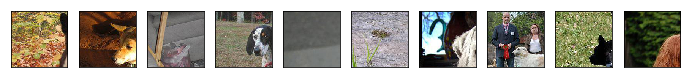

In [6]:
plot.multiple(x_train[:10])

### Prepare the labels

Encode the labels to one-hot vectors

In [7]:
def to_numerical(dataset, labels):
    # transform ['label'] => [index]
    # (list of text => list of indices)
    return [dataset.dict_label_to_index[label] for label in labels]

In [8]:
# text-labels => int-labels
y_train = data.textlabes_to_numerical(dataset, y_train)
y_test = data.textlabels_to_numerical(dataset, y_test)
y_train[0:10]

AttributeError: module 'data' has no attribute 'textlabes_to_numerical'

In [ ]:
# int-labels => one-hot vectors
y_train = to_categorical(y_train)
# ? assuming y_test contains every possible class?
y_test = to_categorical(y_test)

print(y_train.shape, y_train[0].shape)
y_train[0]

# Train a Sequential model (keras)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Dropout, Flatten

In [ ]:
n_samples = x_train.shape[0] # = length of the list of images (matrices)
input_shape = x_train.shape[1:] # = shape of an individual image (matrix)
output_length = (y_train[0]).shape[0] # = length of an individual label
print(n_samples, input_shape)
print('output length', output_length)

In [ ]:
x_train.shape

In [ ]:
import models # src/models.py

model, summary = models.sequential_conv(input_shape, output_length)
summary()

## Loss function
- Categorical cross-entropy loss

In [ ]:
from keras.optimizers import Adam

learning_rate = 0.001
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Finally train the model

In [ ]:
# Compute a batch size
batch_size = round(n_samples / 20)
# n epochs = n iterations over all the training data
epochs = 3

In [ ]:
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=1/5)

In [ ]:
model.predict(x_test)